### Boston Airbnb Analysis

#### Objective

Primary Objective of this project is to do the analysis to identify what features of AirBnb listings and Property will lead to higher revenue. 

Below Questions will be answered through this analysis.

1. Which are the best types of property to rent?
2. Which are the best areas to rent?
3. When is the best time to rent?
4. How much revenue do airbnb hosts make?
5. What should you include in a listing name to maximize revenue?


#### Importing and downloading libraries

In [252]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import string
from wordcloud import WordCloud,ImageColorGenerator
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot
import shap


In [253]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sulella\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sulella\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sulella\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Reading Data

In [254]:
b_listings = pd.read_csv("C:/Users/sulella/Downloads/Data Scientist/project-1/AIRBNB-Boston-DATA/listings.csv")
b_calendar = pd.read_csv("C:/Users/sulella/Downloads/Data Scientist/project-1/AIRBNB-Boston-DATA/calendar.csv")
b_reviews  = pd.read_csv("C:/Users/sulella/Downloads/Data Scientist/project-1/AIRBNB-Boston-DATA/reviews.csv")

In [255]:
b_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [256]:
b_calendar.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [257]:
b_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [258]:
b_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [259]:
b_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [260]:
b_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [261]:
b_listings.shape

(3585, 95)

In [262]:
b_calendar.shape

(1308890, 4)

In [263]:
b_reviews.shape

(68275, 6)

In [264]:
b_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

#### Clean Data

In [265]:
def clean_df(listings_df, calendar_df, reviews_df):
    """
    Return cleaned datasets with all string varaibles for price, weekely_price, monthly_price, 
    security_deposit, cleaning_fee, extra_people replaced with float varaibles without the dollar 
    sign $. Also replace all string variables for host_reponse_rate, host_acceptance_rate with float 
    variables without the percentage sign %. Lastly convert all dates in reviews and calendar dataframe with datetime.
    
    INPUTS:
        listings_df - dataframe for listings
        calendar_df - dataframe for calendar
        reviews_df  - dataframe for reviews
    OUTPUTS:
        listings_df - cleaned dataframe for listings
        calendar_df - cleaned dataframe for calendar
        reviews_df  - cleaned dataframe for reviews 
    """
    #convert string of prices to floats
    listings_df.price=listings_df.price.str.replace('$','')
    listings_df.price=listings_df.price.str.replace(',','').astype(float)
    
    listings_df.weekly_price=listings_df.weekly_price.str.replace('$','')
    listings_df.weekly_price=listings_df.weekly_price.str.replace(',','').astype(float)
    
    listings_df.monthly_price=listings_df.monthly_price.str.replace('$','')
    listings_df.monthly_price=listings_df.monthly_price.str.replace(',','').astype(float)
    
    listings_df.security_deposit=listings_df.security_deposit.str.replace('$','')
    listings_df.security_deposit=listings_df.security_deposit.str.replace(',','').astype(float)
    
    listings_df.cleaning_fee=listings_df.cleaning_fee.str.replace('$','')
    listings_df.cleaning_fee=listings_df.cleaning_fee.str.replace(',','').astype(float)
    
    listings_df.extra_people=listings_df.extra_people.str.replace('$','')
    listings_df.extra_people=listings_df.extra_people.str.replace(',','').astype(float)
    
    calendar_df.price = calendar_df.price.str.replace('$','')
    calendar_df.price = calendar_df.price.str.replace(',','').astype(float)
    
    #convert string of percentages to floats
    listings_df.host_response_rate = listings_df.host_response_rate.str.replace('%','',regex=True)
    listings_df.host_response_rate = listings_df.host_response_rate.astype(float)
    
    listings_df.host_acceptance_rate = listings_df.host_acceptance_rate.str.replace('%','',regex=True)
    listings_df.host_acceptance_rate = listings_df.host_acceptance_rate.astype(float)
    
    #convert date string to datetime
    reviews_df['date']=pd.to_datetime(reviews_df['date'], format='%Y-%m-%d')
    calendar_df['date']=pd.to_datetime(calendar_df['date'], format='%Y-%m-%d')
    
    return listings_df, calendar_df, reviews_df

In [266]:
#clean the dataframes
b_listings, b_calendar, b_reviews = clean_df(b_listings, b_calendar, b_reviews)

In [352]:

def generate_2015_reviews_df(reviews_df):
    """
    Aggregate number of reviews in 2015 for each listing_id. This will serve as an estimate
    for the number of bookings in 2015
    
    INPUTS:
        reviews_df - dataframe for reviews
    OUTPUTS:
        reviews_df_2015_agg - dataframe containing number of reviews per listing_id in 2015
    """
    # Get list of reviews in 2015
    reviews_df_2015 = reviews_df[(reviews_df.date >= '2015-01-01') & (reviews_df.date < '2016-01-01')]
    
    reviews_df_2015_agg = reviews_df_2015.groupby(['listing_id']).agg({'id':'count'})
    reviews_df_2015_agg.rename(index=str, columns={"id": "number_of_reviews_2015"},inplace=True)
    reviews_df_2015_agg['listings_id'] = reviews_df_2015_agg.index.astype('int64')
    
    return reviews_df_2015_agg

In [353]:
b_reviews_2015_agg = generate_2015_reviews_df(b_reviews)
b_reviews_2015_agg.head()

,number_of_reviews_2015,listings_id
listing_id,,
3353,8,3353
5506,3,5506
6695,2,6695
6976,7,6976
8792,7,8792


In [292]:
b_reviews_2015_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1571 entries, 3353 to 10051003
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   number_of_reviews_2015  1571 non-null   int64
 1   listings_id             1571 non-null   int64
dtypes: int64(2)
memory usage: 36.8+ KB


#### Understanding the data

In [269]:
b_listings.groupby(['room_type']).agg({'id':'count'})

,id
room_type,
Entire home/apt,2127
Private room,1378
Shared room,80


In [270]:
b_listings.groupby(['property_type']).agg({'id':'count'})

,id
property_type,
Apartment,2612
Bed & Breakfast,41
Boat,12
Camper/RV,1
Condominium,231
Dorm,2
Entire Floor,4
Guesthouse,1
House,562


In [271]:
b_listings.groupby(['property_type','room_type']).agg({'id':'count'})

id
property_type   room_type            
Apartment       Entire home/apt  1764
                Private room      786
                Shared room        62
Bed & Breakfast Entire home/apt     2
                Private room       38
                Shared room         1
Boat            Entire home/apt    10
                Private room        2
Camper/RV       Entire home/apt     1
Condominium     Entire home/apt   150
                Private room       79
                Shared room         2
Dorm            Private room        2
Entire Floor    Entire home/apt     2
                Private room        2
Guesthouse      Entire home/apt     1
House           Entire home/apt   148
                Private room      405
                Shared room         9
Loft            Entire home/apt    29
                Private room        8
                Shared room         2
Other           Entire home/apt     2
                Private room       11
                Shared room         4
Townhouse       Entire home/apt    14
                Private room       40
Villa           Entire home/apt     2
                Private room        4

In [272]:
b_listings.isnull().mean()[:50]

id                              0.000000
listing_url                     0.000000
scrape_id                       0.000000
last_scraped                    0.000000
name                            0.000000
summary                         0.039888
space                           0.294840
description                     0.000000
experiences_offered             0.000000
neighborhood_overview           0.394700
notes                           0.550907
transit                         0.359833
access                          0.415342
interaction                     0.433473
house_rules                     0.332497
thumbnail_url                   0.167085
medium_url                      0.167085
picture_url                     0.000000
xl_picture_url                  0.167085
host_id                         0.000000
host_url                        0.000000
host_name                       0.000000
host_since                      0.000000
host_location                   0.003068
host_about      

In [273]:
b_listings.isnull().mean()[50:]

is_location_exact                   0.000000
property_type                       0.000837
room_type                           0.000000
accommodates                        0.000000
bathrooms                           0.003905
bedrooms                            0.002789
beds                                0.002510
bed_type                            0.000000
amenities                           0.000000
square_feet                         0.984379
price                               0.000000
weekly_price                        0.751185
monthly_price                       0.752301
security_deposit                    0.625662
cleaning_fee                        0.308787
guests_included                     0.000000
extra_people                        0.000000
minimum_nights                      0.000000
maximum_nights                      0.000000
calendar_updated                    0.000000
has_availability                    1.000000
availability_30                     0.000000
availabili

In [274]:
b_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [275]:
b_calendar['available'].value_counts(dropna=False)

f    665853
t    643037
Name: available, dtype: int64

In [276]:
b_availability = b_calendar.groupby(['listing_id']).available.count()
b_availability.head()

listing_id
3353    365
5506    365
6695    365
6976    365
8792    365
Name: available, dtype: int64

In [277]:
b_availability[b_availability !=365]

listing_id
12898806    730
Name: available, dtype: int64

In [278]:
b_calendar['unavailable'] = np.where(b_calendar['available']=="f",1,0)
b_calendar.head()

,listing_id,date,available,price,unavailable
0,12147973,2017-09-05,f,NaN,1
1,12147973,2017-09-04,f,NaN,1
2,12147973,2017-09-03,f,NaN,1
3,12147973,2017-09-02,f,NaN,1
4,12147973,2017-09-01,f,NaN,1


In [279]:
b_unavailable = b_calendar.groupby(['listing_id']).agg({'unavailable':'sum','available':'count'})
b_unavailable.rename(index=str, columns={"unavailable":"total_days_unavailable",\
                                        "available":"total_days_available"},inplace=True)
b_unavailable['unavailable_percentage']= b_unavailable['total_days_unavailable']/b_unavailable['total_days_available']
b_unavailable.head()

,total_days_unavailable,total_days_available,unavailable_percentage
listing_id,,,
3353,116,365,0.317808
5506,21,365,0.057534
6695,41,365,0.112329
6976,46,365,0.126027
8792,117,365,0.320548


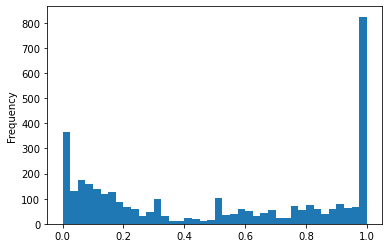

In [280]:
b_unavailable.unavailable_percentage.plot(kind='hist', bins=40)

Now, we have information on listings, customer reviews and listing availability, by using the information we can check for the amount of income generated by an Airbnb property. However there is no point in using the calendar.csv information as it only contains the tracking information for listings when they are available and when they are not. We can infer this since there is a large proportion of properties that is unavailable all year round, and it is unlikely that so many properties are rented out the entire year with no gaps in between bookings.

#### Building Models to Predict listing revenues 

We will estimate the revenue generated by each Airbnb property with the following formula:

price * minimum_nights * number_of_reviews

In [293]:
#get subset of data to work with
b_reg_data = b_listings[['id','host_response_time', 'host_response_rate','host_acceptance_rate',\
                        'host_is_superhost','host_listings_count','host_total_listings_count',\
                        'host_has_profile_pic', 'host_identity_verified','neighbourhood_cleansed',\
                        'is_location_exact','property_type', 'room_type', 'accommodates','bathrooms',\
                        'bedrooms', 'beds', 'bed_type', 'amenities','price','security_deposit',\
                        'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',\
                        'availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy',\
                        'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',\
                        'review_scores_location', 'review_scores_value','instant_bookable','cancellation_policy',
                        'require_guest_profile_picture','require_guest_phone_verification','reviews_per_month']]

In [428]:

def generate_bookings_and_revenues_2015(df, reviews_2015_df):
    """
    Generate estimated number of bookings and booking revenues in 2015. Also keep tracks of
    listing_id which have more than 365 days booked. This listings will be removed from all
    future analysis
    
    INPUTS:
        df - dataframe containing subset of columns from listings to be used for modeling
    OUTPUTS:
        reviews_df_2015_agg - dataframe containing number of reviews per listing_id in 2015
    """
    # Rename id column to listing id so that we can merge listings data with reviews data
    df.rename(index=str, columns={"id": "listing_id"},inplace=True)
    df['listing_id'] = df.index.astype('int64')
      
    

    # Merge number of 2015 reviews to subset of listings
    df = pd.merge(df, reviews_2015_df, how='left', on='listing_id', validate='one_to_one', indicator = True)
    #df = df.merge[reviews_2015_df, on="listings_id"]
    
    

    # Compute estimated total days booked
    df['total_days_booked'] = df['minimum_nights'] * df['number_of_reviews_2015']

    # Compute estimated revenues in 2015
    df['estimated_2015_revenue'] = df['price'] * df['minimum_nights'] *\
    df['number_of_reviews_2015']
    
    # restrict to only people who made income
    df = df[df['estimated_2015_revenue'] > 0]
    df.reset_index(drop=True, inplace=True)
    
    # Store the listing ids which have more than 365 days of booking 
    # This will be for future use
    listings_to_drop = df[df['total_days_booked'] > 365].listings_id
    listings_to_drop = listings_to_drop.tolist()
    
    df = df[df['total_days_booked'] <= 365]
    df.reset_index(drop=True, inplace=True)
 
    return df, listings_to_drop

In [429]:
b_reg_data, listings_to_drop = generate_bookings_and_revenues_2015(b_reg_data, b_reviews_2015_agg)

C:\Users\sulella\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [393]:
b_reg_data.head()

,listing_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,0,NaN,NaN,NaN,f,1,1,t,f,Roslindale,...,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,NaN
1,1,within an hour,100.0,100.0,f,1,1,t,t,Roslindale,...,9.0,10.0,10.0,9.0,9.0,t,moderate,f,f,1.30
2,2,within a few hours,100.0,88.0,t,1,1,t,t,Roslindale,...,9.0,10.0,10.0,9.0,10.0,f,moderate,t,f,0.47
3,3,within a few hours,100.0,50.0,f,1,1,t,f,Roslindale,...,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1.00
4,4,within an hour,100.0,100.0,t,1,1,t,t,Roslindale,...,10.0,10.0,10.0,9.0,10.0,f,flexible,f,f,2.25


In [315]:
listings_to_drop

[]